In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_train = pd.read_csv('F:/Hacker_Earth/Dataset/Train.csv')
df_train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [4]:
df_test = pd.read_csv('F:/Hacker_Earth/Dataset/Test.csv')
df_test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [5]:
df_train.shape

(23856, 18)

In [6]:
df_train.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [7]:
df_test.shape

(15903, 17)

In [8]:
df_test.isnull().sum()

INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64

In [9]:
df_train['MULTIPLE_OFFENSE'].value_counts(normalize= True)*100

1    95.523139
0     4.476861
Name: MULTIPLE_OFFENSE, dtype: float64

In [10]:
df_train.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


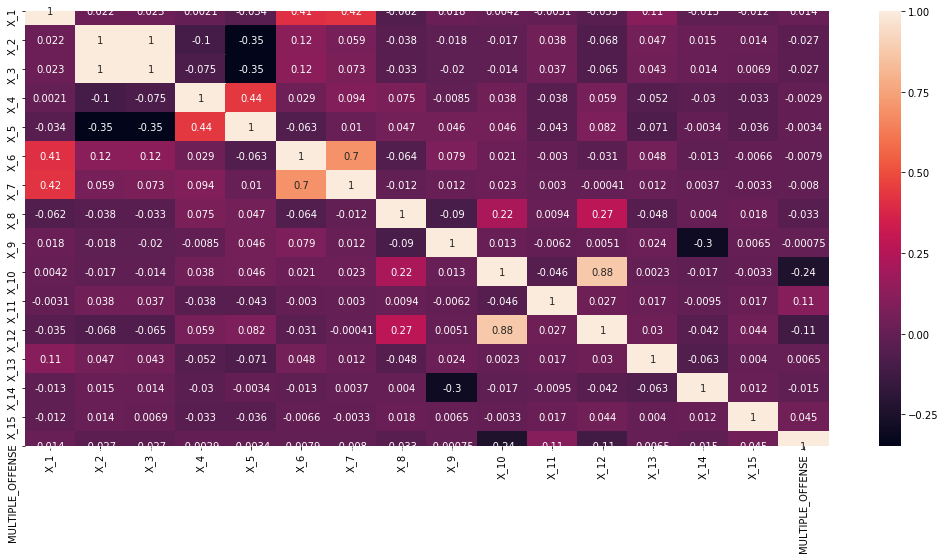

In [11]:
plt.figure(figsize=(18,8))
sns.heatmap(df_train.corr(), annot=True)

Here we can see that only X_10, X_11, X_12 is showing correlation more than |0.1|, rest other feature are very weakly correlated to the target variable.
Also we can see that many independent featured are correlated with each other (means multicolinearity is present)

In [12]:
#sns.pairplot(df_train, hue ='MULTIPLE_OFFENSE')

Nothing new is visible in pair plot.

##### Missing Value Imputation

Let's impute the missing values in x12 column. For this first we have to merge the data sets.

In [13]:
df_new = pd.concat([df_train,df_test], axis=0, ignore_index= True, sort = False)
df_new.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0.0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1.0
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1.0
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1.0
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1.0


In [14]:
df_new.tail()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
39754,CR_44468,28-NOV-97,1,22,22,7,3,15,10,0,5,1,174,0.0,72,29,43,NaN
39755,CR_158460,09-JUN-12,0,35,30,3,5,1,0,2,3,2,0,2.0,72,93,34,NaN
39756,CR_115946,22-APR-06,0,26,27,9,0,6,4,2,6,1,0,1.0,72,62,34,NaN
39757,CR_137663,03-APR-09,0,21,23,4,1,2,7,1,6,2,249,2.0,92,62,34,NaN
39758,CR_33545,24-APR-96,0,4,4,6,5,4,2,5,6,1,249,1.0,72,29,34,NaN


for imputation INCIDENT_ID, DATE, MULTIPLE_OFFENSE column is no relevent so  we will make a new data set and do the imputation by Knn imputation method

In [15]:
df_imp = df_new.drop(columns = ['INCIDENT_ID','DATE','MULTIPLE_OFFENSE'] , axis =1)    

In [16]:
df_imp.isnull().sum()

X_1       0
X_2       0
X_3       0
X_4       0
X_5       0
X_6       0
X_7       0
X_8       0
X_9       0
X_10      0
X_11      0
X_12    309
X_13      0
X_14      0
X_15      0
dtype: int64

In [17]:
from sklearn.impute import KNNImputer

In [18]:
Imp=KNNImputer(n_neighbors=400)
df_imp = Imp.fit_transform(df_imp)

In [19]:
df_new['X_12'] = df_imp[:,11]

In [25]:
df_new['X_12'] = np.round(df_new['X_12'])

Now, Separate the data sets.

In [56]:
df_train = df_new[df_new['MULTIPLE_OFFENSE'].isnull()==False]
df_test = df_new[df_new['MULTIPLE_OFFENSE'].isnull()==True]

In [57]:
df_train.shape, df_test.shape

((23856, 18), (15903, 18))

In [58]:
df_train['X_12'] = df_train['X_12'].astype('int64')
df_train['MULTIPLE_OFFENSE'] = df_train['MULTIPLE_OFFENSE'].astype('int64')
df_test['X_12'] = df_test['X_12'].astype('int64')

Here Incident_Id and Date is not significat to the target variable. So we will remove both the columns. 

In [59]:
df_train = df_train.drop(columns=['INCIDENT_ID','DATE'], axis=1)

In [60]:
X_train = df_train.drop('MULTIPLE_OFFENSE', axis=1)
y_train = df_train['MULTIPLE_OFFENSE']
X_test = df_test.drop(columns = ['INCIDENT_ID','DATE','MULTIPLE_OFFENSE'], axis=1)

Spliting the train data further into train and test. So that we can validate the model.

In [108]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new= train_test_split(X_train, y_train, test_size=0.3, random_state=1)

Importing randomized search CV and randint for hyperparameter tuning

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

##### Feature Selection:
As we saw in the heat map that multi co-linearity is present in this data set. So lets eliminate the highly colinear features through VIF test.  

In [64]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [65]:
Xc=sm.add_constant(X_train)
pd.DataFrame([vif(Xc.values,i) for i in range(Xc.shape[1])], index=Xc.columns,columns=['VIF'])

,VIF
const,64.681602
X_1,1.285113
X_2,208.337494
X_3,209.187328
X_4,1.500192
X_5,1.473630
X_6,2.081904
X_7,2.137144
X_8,1.104990
X_9,1.123292


here X2 and X3 are having a very high value of VIF. So have to remove anyone of them.

In [66]:
X_train = X_train.drop('X_3', axis=1)

In [67]:
Xc=sm.add_constant(X_train)
pd.DataFrame([vif(Xc.values,i) for i in range(Xc.shape[1])], index=Xc.columns,columns=['VIF'])

,VIF
const,64.676573
X_1,1.281195
X_2,1.166797
X_4,1.266900
X_5,1.419315
X_6,2.071748
X_7,2.067793
X_8,1.103937
X_9,1.123173
X_10,4.587199


X_10 and X_12 is also showing a VIF value almost equal to 5. Let's remove either of them.

In [69]:
X_train = X_train.drop('X_12', axis=1)

In [70]:
Xc=sm.add_constant(X_train)
pd.DataFrame([vif(Xc.values,i) for i in range(Xc.shape[1])], index=Xc.columns,columns=['VIF'])

,VIF
const,63.527488
X_1,1.277162
X_2,1.158515
X_4,1.266343
X_5,1.416544
X_6,2.062056
X_7,2.064636
X_8,1.077949
X_9,1.122949
X_10,1.058479


In [211]:
X_test = X_test.drop(columns=['X_3','X_12'], axis=1)

In [214]:
X_train.shape, X_test.shape

((23856, 13), (15903, 13))

Here, we are left with 13 independent features. Let's try out some popular classification algorithms now

##### I tried logistic regression, KNN Classifier  and Random forest with hyperparameter tuning. But None of them gave a better score compared to XGBoost Classifier and Light GBM Classifier. Light GBM gave the best score among all here.

##### So I deleted all other models except XGBoost Classifier and LightGBM classifier.

###### XGBoost Classifier

In [125]:
import xgboost as xgb

xgbc = xgb.XGBClassifier()

Hyperparameter tuning

In [134]:
xgbc = xgb.XGBClassifier(random_state=100)

params = {'n_estimators': randint(5,250),'max_depth': randint(2, 15),'min_child_weight': randint(1, 20),
          'learning_rate':np.linspace(0.01,0.1,10)}

rand_search_xgbc = RandomizedSearchCV(xgbc,param_distributions=params, cv=5, random_state=100, n_iter=100)

rand_search_xgbc.fit(X_train, y_train)
print(rand_search_xgbc.best_params_)

{'learning_rate': 0.09000000000000001, 'max_depth': 13, 'min_child_weight': 1, 'n_estimators': 184}


Validating the tuned model

In [135]:
xgbc= xgb.XGBClassifier(**rand_search_xgbc.best_params_)
xgbc.fit(X_train_new,y_train_new)
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score, classification_report
train_pred=xgbc.predict(X_train_new)
train_prob=xgbc.predict_proba(X_train_new)[:,1]

print('overall accuracy -Train: ',accuracy_score(y_train_new,train_pred))
print('confusion matrix:\n',confusion_matrix (y_train_new,train_pred))
print('AUC-train:',roc_auc_score(y_train_new,train_prob))
print('classification_report:\n'classification_report(y_train_new,train_pred))


test_pred=xgbc.predict(X_test_new)
test_prob=xgbc.predict_proba(X_test_new)[:,1]
print('overall accuracy -Test: ',accuracy_score(y_test_new,test_pred))
print('confusion matrix:\n',confusion_matrix (y_test_new,test_pred))
print('AUC-train:',roc_auc_score(y_test_new,test_prob))
print('classification_report:\n'classification_report(y_test_new,test_pred))

overall accuracy -Train:  1.0
confusion matrix:
 [[  736     0]
 [    0 15963]]
AUC-train: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       736
           1       1.00      1.00      1.00     15963

    accuracy                           1.00     16699
   macro avg       1.00      1.00      1.00     16699
weighted avg       1.00      1.00      1.00     16699

overall accuracy -Test:  0.9991616599133715
confusion matrix:
 [[ 329    3]
 [   3 6822]]
AUC-train: 0.999596628271327
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       332
           1       1.00      1.00      1.00      6825

    accuracy                           1.00      7157
   macro avg       1.00      1.00      1.00      7157
weighted avg       1.00      1.00      1.00      7157



Predicting for test data provided

In [136]:
xgbc= xgb.XGBClassifier(**rand_search_xgbc.best_params_)
xgbc.fit(X_train,y_train)
xgbc_pred = xgbc.predict(X_test)

In [137]:
output = pd.DataFrame({'INCIDENT_ID': df_test['INCIDENT_ID'] , 'MULTIPLE_OFFENSE': xgbc_pred})
output.to_csv('F:/Hacker_Earth/Dataset/my_submission_xgbc.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


##### Light GBM Classifier

Importing and Hyperparameter tuning of LGBMClassifier

In [138]:
import lightgbm as lgb

lgbc = lgb.LGBMClassifier()

lgbc = lgb.LGBMClassifier(random_state=100)

params = {'n_estimators': randint(5,250),'max_depth': randint(2, 20),'min_child_samples': randint(1, 20),
          'num_leaves': randint(5,50)}

rand_search_lgbc = RandomizedSearchCV(lgbc,param_distributions=params, cv=5, random_state=100, n_iter=120)

rand_search_lgbc.fit(X_train, y_train)

print(rand_search_lgbc.best_params_)

{'max_depth': 7, 'min_child_samples': 5, 'n_estimators': 245, 'num_leaves': 6}


Validating the tuned model

In [139]:
lgbc= lgb.LGBMClassifier(**rand_search_lgbc.best_params_)
lgbc.fit(X_train_new,y_train_new)
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score, classification_report
train_pred=lgbc.predict(X_train_new)
train_prob=lgbc.predict_proba(X_train_new)[:,1]

print('overall accuracy -Train: ',accuracy_score(y_train_new,train_pred))
print('confusion matrix:\n',confusion_matrix (y_train_new,train_pred))
print('AUC-train:',roc_auc_score(y_train_new,train_prob))
print('classification_report:\n',classification_report(y_train_new,train_pred))


test_pred=lgbc.predict(X_test_new)
test_prob=lgbc.predict_proba(X_test_new)[:,1]
print('overall accuracy -Test: ',accuracy_score(y_test_new,test_pred))
print('confusion matrix:\n',confusion_matrix (y_test_new,test_pred))
print('AUC-train:',roc_auc_score(y_test_new,test_prob))
print('classification_report:\n'classification_report(y_test_new,test_pred))

overall accuracy -Train:  0.9998802323492425
confusion matrix:
 [[  734     2]
 [    0 15963]]
AUC-train: 0.9999999999999999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       736
           1       1.00      1.00      1.00     15963

    accuracy                           1.00     16699
   macro avg       1.00      1.00      1.00     16699
weighted avg       1.00      1.00      1.00     16699

overall accuracy -Test:  0.9988822132178287
confusion matrix:
 [[ 325    7]
 [   1 6824]]
AUC-train: 0.9999333598128778
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       332
           1       1.00      1.00      1.00      6825

    accuracy                           1.00      7157
   macro avg       1.00      0.99      0.99      7157
weighted avg       1.00      1.00      1.00      7157



Predicting for the test data provided

In [178]:
lgbc= lgb.LGBMClassifier(**rand_search_lgbc.best_params_)
lgbc.fit(X_train,y_train)
lgbc_pred = lgbc.predict(X_test)

In [141]:
output = pd.DataFrame({'INCIDENT_ID': df_test['INCIDENT_ID'] , 'MULTIPLE_OFFENSE': lgbc_pred})
output.to_csv('F:/Hacker_Earth/Dataset/my_submission_lgbc.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


##### After this I also tried PCA but it was not improving the score.

#### Let's try Voting Classifier for the above two models

In [172]:
from sklearn.ensemble import VotingClassifier

I tried different combinations of weights for voting. I got the best score in 1:3 ratio.

In [189]:
clf = VotingClassifier(estimators=[('xgbc', xgbc), ('lgbc', lgbc)], voting='soft', weights=[1,3])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [190]:
output = pd.DataFrame({'INCIDENT_ID': df_test['INCIDENT_ID'] , 'MULTIPLE_OFFENSE': y_pred})
output.to_csv('F:/Hacker_Earth/Dataset/my_submission_vote.csv', index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


This the final model I submitted. It gave my best score of 99.58.

#### Note:
#### 1. For this data, Light GBM Classifier alone gave the score of 99.57. After the voting classifier very little increment in score ( less than 0.01) happened. So We can say that LGBMClassifier alone can be considered the best model for this data.

#### 2. I have used RandomizedSearchCV instead of GridSearchCV in this problem beacuse It was taking too much time. It searches for all possible combinations of hyperparameter. So we can say that there is still a scope of improvement in score.